In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [11]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [13]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [14]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [15]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [16]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [19]:
# Independent and dependent features
X = df.drop('FWI',axis=1)
Y = df['FWI']

In [21]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [23]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [26]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.30,random_state=30)

In [28]:
X_Train.shape,X_Test.shape,Y_Train.shape,Y_Test.shape

((170, 11), (73, 11), (170,), (73,))

In [30]:
## Feature selection based on correlation
X_Train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.680511,-0.353781,-0.359767,0.706423,0.504617,0.374539,0.646884,0.469434,0.583507,0.304277
RH,-0.680511,1.000000,0.329457,0.248497,-0.670860,-0.372601,-0.201218,-0.678407,-0.319051,-0.443531,-0.396691
Ws,-0.353781,0.329457,1.000000,0.272493,-0.260949,-0.043918,0.049011,-0.073933,-0.007250,-0.140771,-0.254189
Rain,-0.359767,0.248497,0.272493,1.000000,-0.514223,-0.268453,-0.276262,-0.330196,-0.275369,-0.366965,-0.096182
FFMC,0.706423,-0.670860,-0.260949,-0.514223,1.000000,0.610920,0.499881,0.733006,0.591010,0.759164,0.262087
DMC,0.504617,-0.372601,-0.043918,-0.268453,0.610920,1.000000,0.889092,0.654857,0.982737,0.609549,0.178406
DC,0.374539,-0.201218,0.049011,-0.276262,0.499881,0.889092,1.000000,0.492245,0.946298,0.518022,-0.101963
ISI,0.646884,-0.678407,-0.073933,-0.330196,0.733006,0.654857,0.492245,1.000000,0.620205,0.740130,0.271323
BUI,0.469434,-0.319051,-0.007250,-0.275369,0.591010,0.982737,0.946298,0.620205,1.000000,0.604086,0.067930
Classes,0.583507,-0.443531,-0.140771,-0.366965,0.759164,0.609549,0.518022,0.740130,0.604086,1.000000,0.223556


# Feature Selection

<AxesSubplot: >

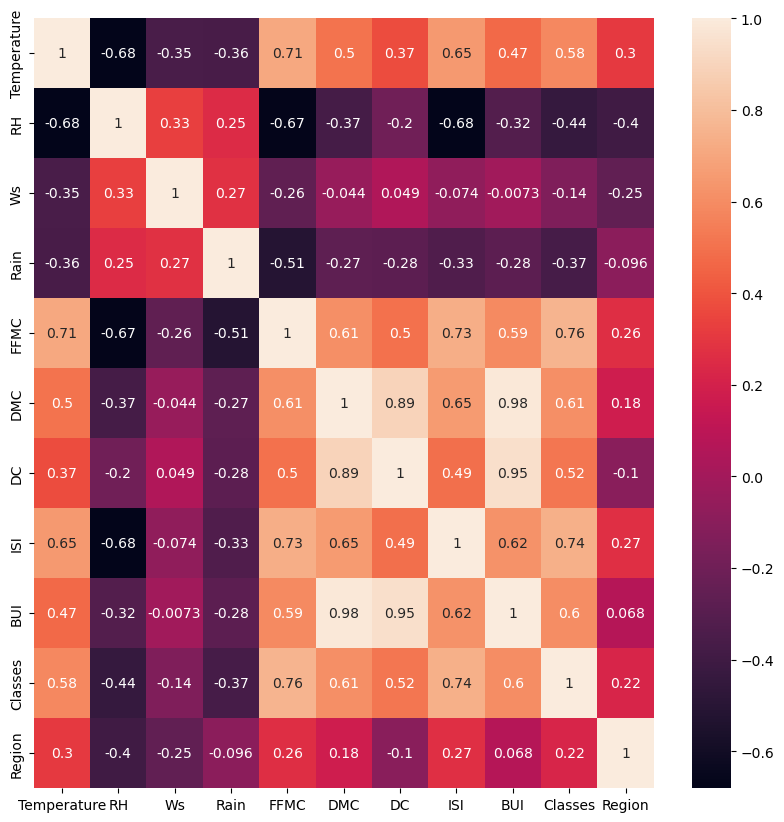

In [35]:
## check for multicollinearity
plt.figure(figsize = (10,10))
corr = X_Train.corr()
sns.heatmap(corr,annot=True)

In [36]:
X_Train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.680511,-0.353781,-0.359767,0.706423,0.504617,0.374539,0.646884,0.469434,0.583507,0.304277
RH,-0.680511,1.000000,0.329457,0.248497,-0.670860,-0.372601,-0.201218,-0.678407,-0.319051,-0.443531,-0.396691
Ws,-0.353781,0.329457,1.000000,0.272493,-0.260949,-0.043918,0.049011,-0.073933,-0.007250,-0.140771,-0.254189
Rain,-0.359767,0.248497,0.272493,1.000000,-0.514223,-0.268453,-0.276262,-0.330196,-0.275369,-0.366965,-0.096182
FFMC,0.706423,-0.670860,-0.260949,-0.514223,1.000000,0.610920,0.499881,0.733006,0.591010,0.759164,0.262087
DMC,0.504617,-0.372601,-0.043918,-0.268453,0.610920,1.000000,0.889092,0.654857,0.982737,0.609549,0.178406
DC,0.374539,-0.201218,0.049011,-0.276262,0.499881,0.889092,1.000000,0.492245,0.946298,0.518022,-0.101963
ISI,0.646884,-0.678407,-0.073933,-0.330196,0.733006,0.654857,0.492245,1.000000,0.620205,0.740130,0.271323
BUI,0.469434,-0.319051,-0.007250,-0.275369,0.591010,0.982737,0.946298,0.620205,1.000000,0.604086,0.067930
Classes,0.583507,-0.443531,-0.140771,-0.366965,0.759164,0.609549,0.518022,0.740130,0.604086,1.000000,0.223556


In [57]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [58]:
# threshold -- Domain Expertise
corr_features = correlation(X_Train,0.85)

In [59]:
corr_features

set()

In [60]:
## drop features when correlation is more than 0.85
X_Train.drop(corr_features,axis = 1,inplace=True)
X_Test.drop(corr_features,axis = 1,inplace=True)
X_Train.shape,X_Test.shape

((170, 9), (73, 9))

## Feature Scailing or Standardization

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Train_Scaled = scaler.fit_transform(X_Train)
X_Test_Scaled = scaler.transform(X_Test)

In [66]:
X_Train_Scaled

array([[-0.36287686,  0.69993475, -0.54192804, ..., -0.93968675,
        -1.11213403,  0.98830369],
       [ 0.72415515, -0.35598456, -0.54192804, ..., -0.62674105,
        -1.11213403,  0.98830369],
       [ 0.72415515, -1.14792405,  0.48551917, ...,  0.1676596 ,
         0.8991722 ,  0.98830369],
       ...,
       [-0.36287686,  0.6339398 ,  0.48551917, ...,  0.52875081,
         0.8991722 ,  0.98830369],
       [ 0.45239715, -1.0819291 ,  0.48551917, ...,  1.49166068,
         0.8991722 ,  0.98830369],
       [ 0.18063914,  0.43595492,  1.17048398, ...,  0.31209608,
         0.8991722 , -1.01183473]])

# Box Plot to understand Effect of Standard Scaler


/tmp/ipykernel_637/1776589555.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_Train After scailing')

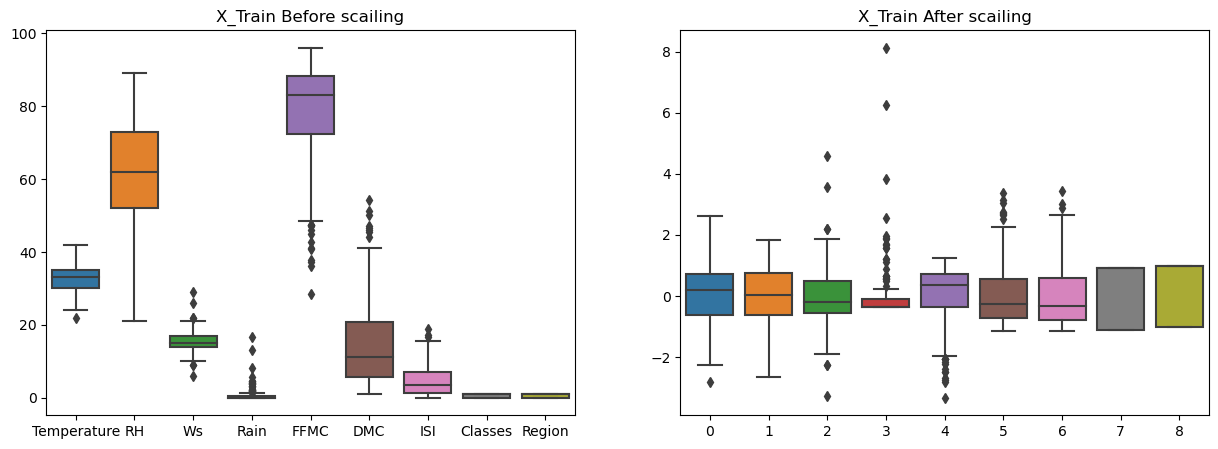

In [77]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_Train)
plt.title('X_Train Before scailing')
plt.subplot(1,2,2)
sns.boxplot(X_Train_Scaled)
plt.title('X_Train After scailing')

/tmp/ipykernel_637/2812880772.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_Test After scailing')

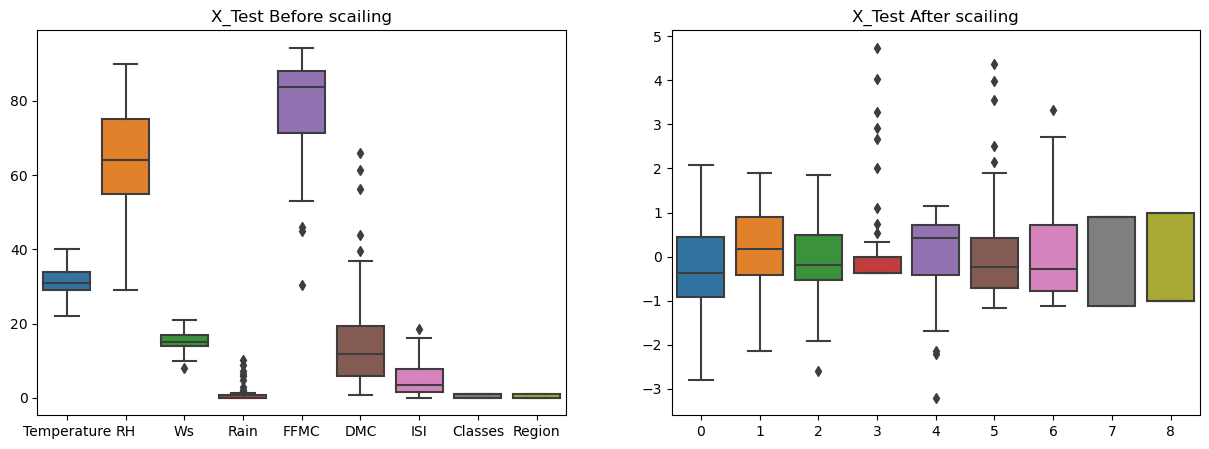

In [78]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_Test)
plt.title('X_Test Before scailing')
plt.subplot(1,2,2)
sns.boxplot(X_Test_Scaled)
plt.title('X_Test After scailing')

# Linear Regression Model

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_Train_Scaled,Y_Train)
y_pred = regression.predict(X_Test_Scaled)
mae = mean_absolute_error(Y_Test,y_pred)
score = r2_score(Y_Test,y_pred)
print('Mean Absolute Error :',mae)
print('R2 Square :',score)

Mean Absolute Error : 0.7204915449552219
R2 Square : 0.9847628209157613


# Lasso Regression

In [87]:
from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_Train_Scaled,Y_Train)
y_pred = lasso.predict(X_Test_Scaled)
mae = mean_absolute_error(Y_Test,y_pred)
score = r2_score(Y_Test,y_pred)
print('Mean Absolute Error :',mae)
print('R2 Square :',score)

Mean Absolute Error : 1.2931080232773482
R2 Square : 0.9478412164174974


# Ridge Regression


In [88]:
from sklearn.linear_model import Ridge
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_Train_Scaled,Y_Train)
y_pred = ridge.predict(X_Test_Scaled)
mae = mean_absolute_error(Y_Test,y_pred)
score = r2_score(Y_Test,y_pred)
print('Mean Absolute Error :',mae)
print('R2 Square :',score)

Mean Absolute Error : 0.7339970288336102
R2 Square : 0.984205352857649


# Elasticnet Regression

In [89]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import r2_score
elasticnet = ElasticNet()
elasticnet.fit(X_Train_Scaled,Y_Train)
y_pred = elasticnet.predict(X_Test_Scaled)
mae = mean_absolute_error(Y_Test,y_pred)
score = r2_score(Y_Test,y_pred)
print('Mean Absolute Error :',mae)
print('R2 Square :',score)

Mean Absolute Error : 1.9161388195215037
R2 Square : 0.8758127464167961


# pickling

In [91]:
import pickle
pickle.dump(scaler,open('Scaler.pkl','wb'))
pickle.dump(ridge,open('Ridge.pkl','wb'))